<a href="https://colab.research.google.com/github/ZHAbotorabi/AI-Powered-Optimization-for-Copper-Manufacturing/blob/main/Electrolysis_Process_Optimization_in_Copper_Extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Electrolysis Process Optimization in Copper Extraction**
Copper extraction is a key sector of the metallurgy and mining industry and has a direct impact on the **electrical, electronics, automotive, construction, and renewable energy industries**.

The global demand for copper is increasing due to the growth of **electric vehicles, smart infrastructure, and renewable energy development**, making this industry more crucial than ever.

## Key Features of the Dataset
In this project, The data was designed based on real industrial conditions and includes 1,000 samples representing various copper extraction and refining processes.

- **Copper Sulfate Concentration (CuSO₄)**: Ranges from 60 to 140 mg/L
- **Electrolysis Current (Current_A)**: Ranges from 100 to 300 Amperes
- **Electrolysis Voltage (Voltage_V)**: Ranges from 1.5 to 4 Volts
- **Solution pH Level**: Ranges from 2.0 to 5.0
- **Electrolysis Time (Electrolysis_Time)**: Ranges from 60 to 180 minutes
- **Final Copper Purity (Purity_Cu)**: Ranges from 90% to 99% (Target variable for prediction)

## Purpose of Using This Data
- Analyze the impact of each parameter on copper purity
- Develop machine learning models to predict copper purity
- Optimize electrolysis conditions to enhance quality and reduce costs

This dataset helps us optimize the copper electrolysis process and leverage machine learning to improve copper purity and efficiency in the extraction and refining industry.

## Project Summary
This project applies machine learning techniques to optimize the electrolysis process in copper extraction. Using Random Forest Regression and Ridge Regression, we analyze industrial data to predict copper purity (%) and improve the efficiency of the electrolytic refining process.

##**The goal**:
it is to identify key factors influencing purity, reduce operational costs, and ensure higher-quality copper production by adjusting key parameters like **CuSO₄ concentration, voltage, current, pH, and electrolysis time**.





# Expected Benefits & Business Impact
- Increased Copper Purity - Better control over electrolysis parameters
- Reduced Energy Consumption - Optimizing voltage & current levels
- Lower Waste & Impurities - Enhancing refining efficiency
- Data-Driven Decision Making - AI-driven process automation

**This AI-driven process control can significantly improve efficiency and sustainability in mining, metallurgy, and electrochemical industries.**

# Step 1: Setup and Load Data
Upload your CSV file and read the data.

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv("realistic_electrolysis_data.csv")

# Display basic info
df.head()

,CuSO4_Concentration,Current_A,Voltage_V,pH,Electrolysis_Time,Purity_Cu
0,109.934283,269.967772,2.027375,2.000000,94.095192,94.152481
1,97.234714,246.231684,2.398837,2.811692,119.063895,94.093172
2,112.953771,202.981518,1.945306,3.169116,120.540506,91.408714
3,130.460597,167.653161,2.284427,5.000000,134.178910,94.339820
4,95.316933,234.911166,1.500000,3.945242,78.994249,96.465658


# Industry Application & Problem Solved
- Industry: Metallurgy & Mining (Copper Extraction & Refining)
- Solution for: Mining companies, electrochemical processing plants, and metallurgy firms

## Problem in Copper Extraction:
- Maintaining high-purity copper production (99.99%) is challenging due to fluctuations in process parameters.
- Traditional process control is manual and experience-based, leading to waste, inefficiency, and inconsistent purity levels.
- Machine learning provides predictive insights to help optimize electrolysis conditions for maximum efficiency.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CuSO4_Concentration  1000 non-null   float64
 1   Current_A            1000 non-null   float64
 2   Voltage_V            1000 non-null   float64
 3   pH                   1000 non-null   float64
 4   Electrolysis_Time    1000 non-null   float64
 5   Purity_Cu            1000 non-null   float64
dtypes: float64(6)
memory usage: 47.0 KB


# Step 2: Data Exploration and Visualization
Analyze dataset structure, distributions, and correlations.

In [ ]:
# Check for missing values
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 CuSO4_Concentration    0
Current_A              0
Voltage_V              0
pH                     0
Electrolysis_Time      0
Purity_Cu              0
dtype: int64


In [ ]:
# Summary statistics
print("\nData Description:\n", df.describe())



Data Description:
        CuSO4_Concentration    Current_A    Voltage_V           pH  \
count          1000.000000  1000.000000  1000.000000  1000.000000   
mean            100.302231   203.528549     2.520502     3.486058   
std              18.853536    47.691890     0.632886     0.782392   
min              60.000000   100.000000     1.500000     2.000000   
25%              87.048194   169.687916     2.046400     2.910064   
50%             100.506012   203.153857     2.499824     3.500148   
75%             112.958878   236.444109     2.962641     4.033556   
max             140.000000   300.000000     4.000000     5.000000   

       Electrolysis_Time    Purity_Cu  
count        1000.000000  1000.000000  
mean          118.739249    94.887160  
std            28.284477     1.957375  
min            60.000000    90.000000  
25%            99.521851    93.612614  
50%           119.452740    94.914346  
75%           139.173694    96.224894  
max           180.000000    99.000000 

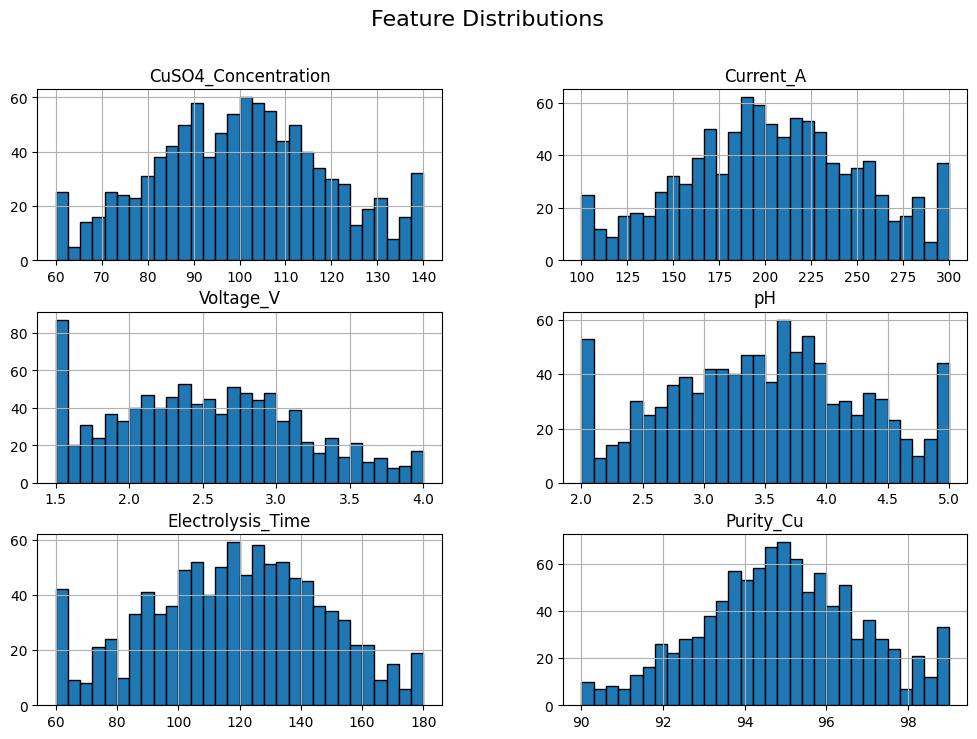

In [ ]:
# Plot feature distributions
df.hist(figsize=(12, 8), bins=30, edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()


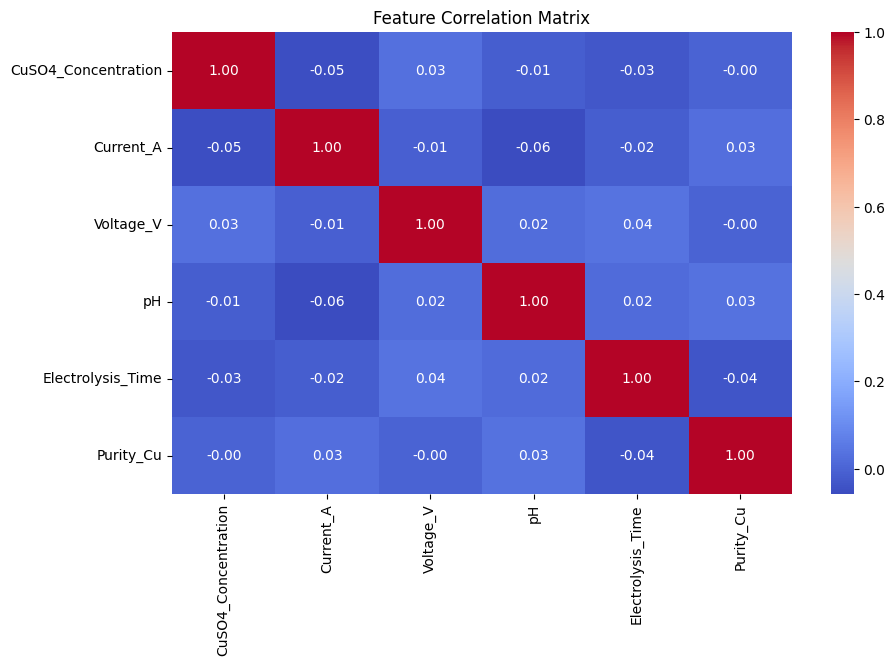

In [ ]:
# Correlation matrix
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

# Step 3: Data Preprocessing
Prepare the dataset for machine learning models.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define features (X) and target (y)
X = df.drop(columns=['Purity_Cu'])
y = df['Purity_Cu']

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features (important for models like Ridge Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Machine Learning Approach in This Project
### 1- **Data Collection:** Industrial electrolysis data (**CuSO₄ concentration, current, voltage, pH, time**).
### 2- **Feature Engineering:** Identifying key factors affecting purity.
### 3- **Model Training & Comparison:**
- Random Forest Regression (for non-linear dependencies)
- Ridge Regression (for process stability analysis)

### 4- **Optimization & Prediction:**
Fine-tuning operational parameters for maximum purity with minimum energy cost.

# Step 4: Train & Compare Two Machine Learning Models
We will compare Random Forest Regression and Ridge Regression.

## Model 1: Random Forest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate performance
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Random Forest MAE: {mae_rf:.2f}")
print(f"Random Forest R² Score: {r2_rf:.2f}")


Random Forest MAE: 1.62
Random Forest R² Score: -0.04


## Model 2: Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge

# Train Ridge Regression model
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_ridge = ridge_model.predict(X_test_scaled)

# Evaluate performance
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
print(f"Ridge Regression MAE: {mae_ridge:.2f}")
print(f"Ridge Regression R² Score: {r2_ridge:.2f}")


Ridge Regression MAE: 1.58
Ridge Regression R² Score: -0.00


# Step 5: Compare Model Performances

In [ ]:
# Compare models
comparison = pd.DataFrame({
    "Model": ["Random Forest", "Ridge Regression"],
    "Mean Absolute Error (MAE)": [mae_rf, mae_ridge],
    "R² Score": [r2_rf, r2_ridge]
})

# Display results
print("\nModel Comparison:\n", comparison)



Model Comparison:
               Model  Mean Absolute Error (MAE)  R² Score
0     Random Forest                   1.620701 -0.043961
1  Ridge Regression                   1.579352 -0.002457


In [ ]:
# Compute residuals for both models

# Residuals = Actual values - Predicted values
residuals_rf = y_test - y_pred_rf  # Residuals for Random Forest model
residuals_ridge = y_test - y_pred_ridge  # Residuals for Ridge Regression model

# Display first few residual values for verification
residuals_df = pd.DataFrame({
    "Actual Values": y_test.values,
    "Predicted RF": y_pred_rf,
    "Residual RF": residuals_rf,
    "Predicted Ridge": y_pred_ridge,
    "Residual Ridge": residuals_ridge
})
residuals_df.head(2)

,Actual Values,Predicted RF,Residual RF,Predicted Ridge,Residual Ridge
521,93.676917,95.234735,-1.557818,94.796574,-1.119657
737,97.824054,94.871139,2.952915,94.788074,3.035980


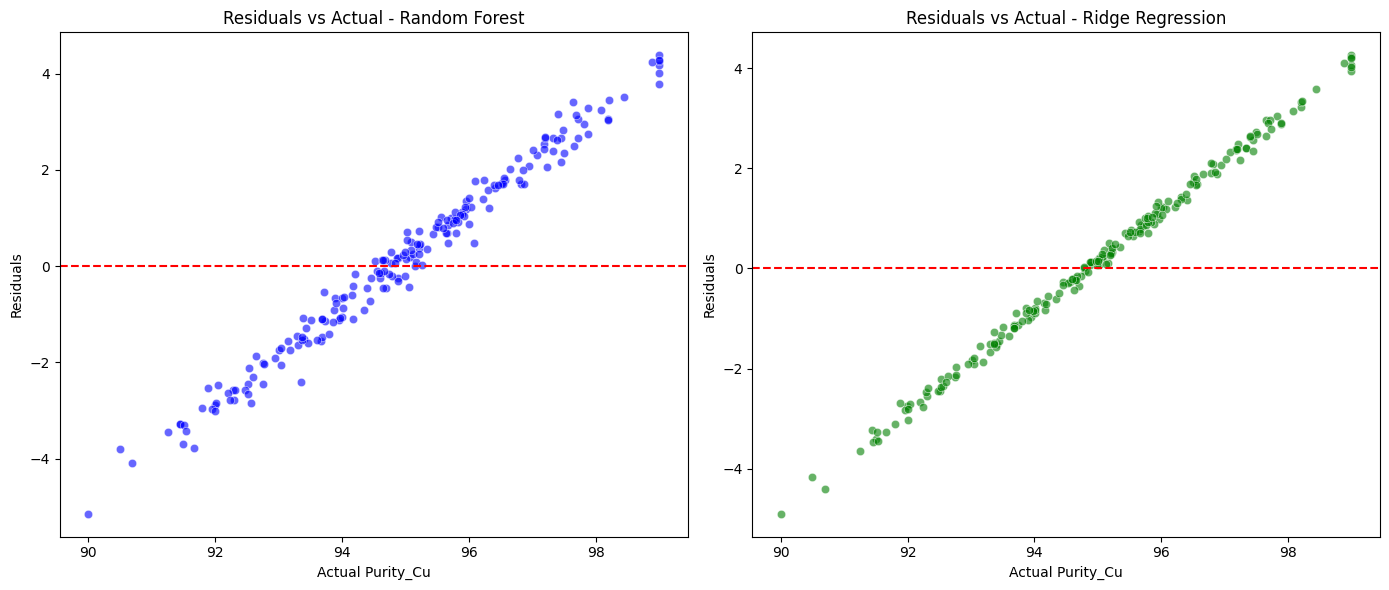

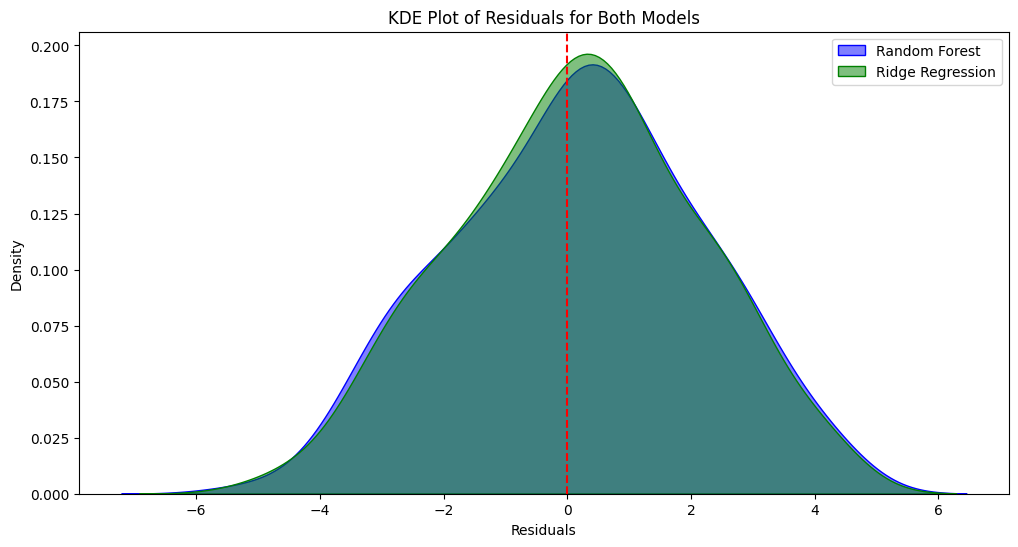

In [ ]:
# Ensuring the residuals are in a valid format
residuals_rf = np.array(residuals_rf)
residuals_ridge = np.array(residuals_ridge)

# Creating improved residual plots for better comparison

plt.figure(figsize=(14, 6))

# Scatter plot for residuals of Random Forest
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=residuals_rf, color='blue', alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--', linewidth=1.5)
plt.title("Residuals vs Actual - Random Forest")
plt.xlabel("Actual Purity_Cu")
plt.ylabel("Residuals")

# Scatter plot for residuals of Ridge Regression
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=residuals_ridge, color='green', alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--', linewidth=1.5)
plt.title("Residuals vs Actual - Ridge Regression")
plt.xlabel("Actual Purity_Cu")
plt.ylabel("Residuals")

# Show the plots
plt.tight_layout()
plt.show()

# KDE Plot for Residual Distributions
plt.figure(figsize=(12, 6))
sns.kdeplot(residuals_rf, fill=True, color="blue", label="Random Forest", alpha=0.5)
sns.kdeplot(residuals_ridge, fill=True, color="green", label="Ridge Regression", alpha=0.5)
plt.axvline(0, color='red', linestyle='--', linewidth=1.5)
plt.title("KDE Plot of Residuals for Both Models")
plt.xlabel("Residuals")
plt.ylabel("Density")
plt.legend()
plt.show()


# Next Steps: Further Improvements
- Try other models like XGBoost or Neural Networks.
- Perform hyperparameter tuning for both models using GridSearchCV.
- Add feature engineering by creating new features based on domain knowledge.

# **Appendix:** Overview of Copper Extraction & Electrolysis Process
## **Step 1: Mining & Ore Processing**
Copper is extracted from ores like chalcopyrite (CuFeS₂) through hydrometallurgy (leaching) or pyrometallurgy (smelting).

## **Step 2: Leaching & Solution Preparation**
In hydrometallurgy, sulfuric acid dissolves copper from the ore, creating a CuSO₄ solution.

## **Step 3: Electrolysis (Electrowinning/Refining)**

- Anode: Impure copper plates
- Electrolyte: CuSO₄ + H₂SO₄ solution
- Cathode: Pure copper plate
- Applying DC voltage forces Cu²⁺ ions to migrate to the cathode, depositing 99.99% pure copper while impurities settle as anode sludge.